In [1]:
from mayavi import mlab #use this to get mayavi to work in notebook
from tvtk.api import tvtk
#mlab.init_notebook()

from libcomcat import comcat
from datetime import datetime
import pprint
import numpy as np

import matplotlib.pyplot as plt

from obspy.imaging.beachball import beach #imports beachball diagrams from Obspy

from mpl_toolkits.basemap import Basemap 

#from mayavi import mlab


********************************************************************************
         to build the TVTK classes (6.3). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
# Download earthquake data including focal mechanisms
if __name__ == '__main__':
    printer = pprint.PrettyPrinter(indent=2)
    ymax,xmin = (39.2,-123.00)
    ymin,xmax = (38.00,-122.18)
    starttime = datetime(2012,1,1)
    endtime = datetime.utcnow()
    magrange = (4,9.9)
    data,maxmags = comcat.getEventData(bounds=(xmin,xmax,ymin,ymax),
                               starttime=starttime,endtime=endtime,
                               magrange=magrange,
                               getComponents=True,
                               getAngles=True)
    
 #   for event in data:
        #each value in the event dictionary contains a list the value 
        #and the formatting string used to display that value.
        #for this application, just get the value
        #sometimes these values will be NaN.
  #      strike1 = event['strike1'][0]
   #     dip1 = event['dip1'][0]
    #    rake1 = event['rake1'][0]
     #   strike2 = event['strike2'][0]
      #  dip2 = event['dip2'][0]
       # rake2 = event['rake2'][0]


In [33]:
len(data)
    

7

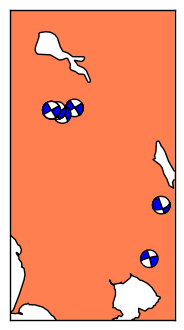

In [12]:
# create Basemap instance with Mercator projection
# we want a slightly smaller region than covered by our SRTM data
m = Basemap(projection='merc', lon_0=-122.45, lat_0=38.74, resolution="h",area_thresh = 0.1,
            llcrnrlon=-123.029, llcrnrlat=37.967, 
            urcrnrlon=-122.182, urcrnrlat=39.214)

# Add lat, long positions for earthquakes from the API
lats=[] #Define the latitude array
lons=[] #Define the longitude array
depth=[]
for i in range(len(data)):
    element = data[i]['lat'][0]
    lats.append(element) # Append all Latitudes into one array
    element = data[i]['lon'][0]
    lons.append(element) # Append all Longitudes into one array
    element = data[i]['depth'][0]*-1*1000 # Append all depths into one array and convert depth to negative value and convert to meters
    depth.append(element)

x, y= m(lons, lats)

m.scatter(x,y)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'coral')
m.drawmapboundary()

# Focal mechanisms from API data, specified as [strike, dip, rake]
focmecs = []
for i in range(len(data)):
    element = [data[i]['strike1'][0], data[i]['dip1'][0], data[i]['rake1'][0]]
    focmecs.append(element)
    
ax = plt.gca()
for i in range(len(focmecs)):
    b = beach(focmecs[i], xy=(x[i], y[i]), width=10000, linewidth=1)
    b.set_zorder(10)
    ax.add_collection(b)

    
plt.show()

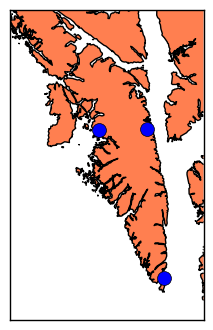

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
plt.show()

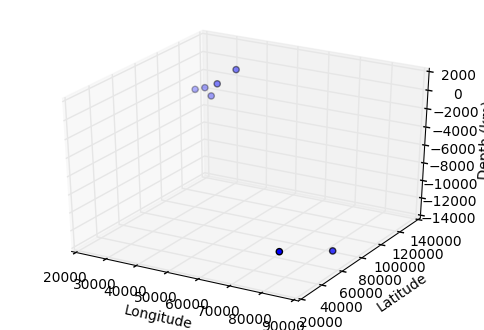

In [19]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, depth)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')

# #ploting cities
# cl = [38.9612, -122.6300]
# r = [38.8897, -122.2371]
# mr = [38.8733, -122.4256]

plt.show()

#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [4]:
s=[0.1, 0.2, 0.3, 0.5, 0.8, 0.7, 0.2]
s


[0.1, 0.2, 0.3, 0.5, 0.8, 0.7, 0.2]

7

In [4]:

from mayavi import mlab
#mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(0, 0, 0))

# Visualize the points
pts = mlab.points3d(x, y, depth,color=(0, 0.5, 1), scale_mode='none', scale_factor=1500)

# Create and visualize the mesh
#mesh = mlab.pipeline.delaunay2d(pts)
#surf = mlab.pipeline.surface(mesh)

#mlab.view(47, 57, 8.2, (0.1, 0.15, 0.14))
mlab.axes()
mlab.show()

In [12]:
import numpy as np

# Create data with x and y random in the [-2, 2] segment, and z a
# Gaussian function of x and y.
np.random.seed(12345)
x = 4 * (np.random.random(500) - 0.5)
y = 4 * (np.random.random(500) - 0.5)


def f(x, y):
    return np.exp(-(x ** 2 + y ** 2))

z = f(x, y)

from mayavi import mlab
mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(0, 0, 0))

# Visualize the points
pts = mlab.points3d(x, y, z, z, scale_mode='none', scale_factor=0.1)

# Create and visualize the mesh
#mesh = mlab.pipeline.delaunay2d(pts)
#surf = mlab.pipeline.surface(mesh)

mlab.view(47, 57, 8.2, (0.1, 0.15, 0.14))
mlab.show()

In [17]:
depth

[277.0, -2800.0, -2200.0, -2600.0, -11120.0, -930.0, -12830.0]

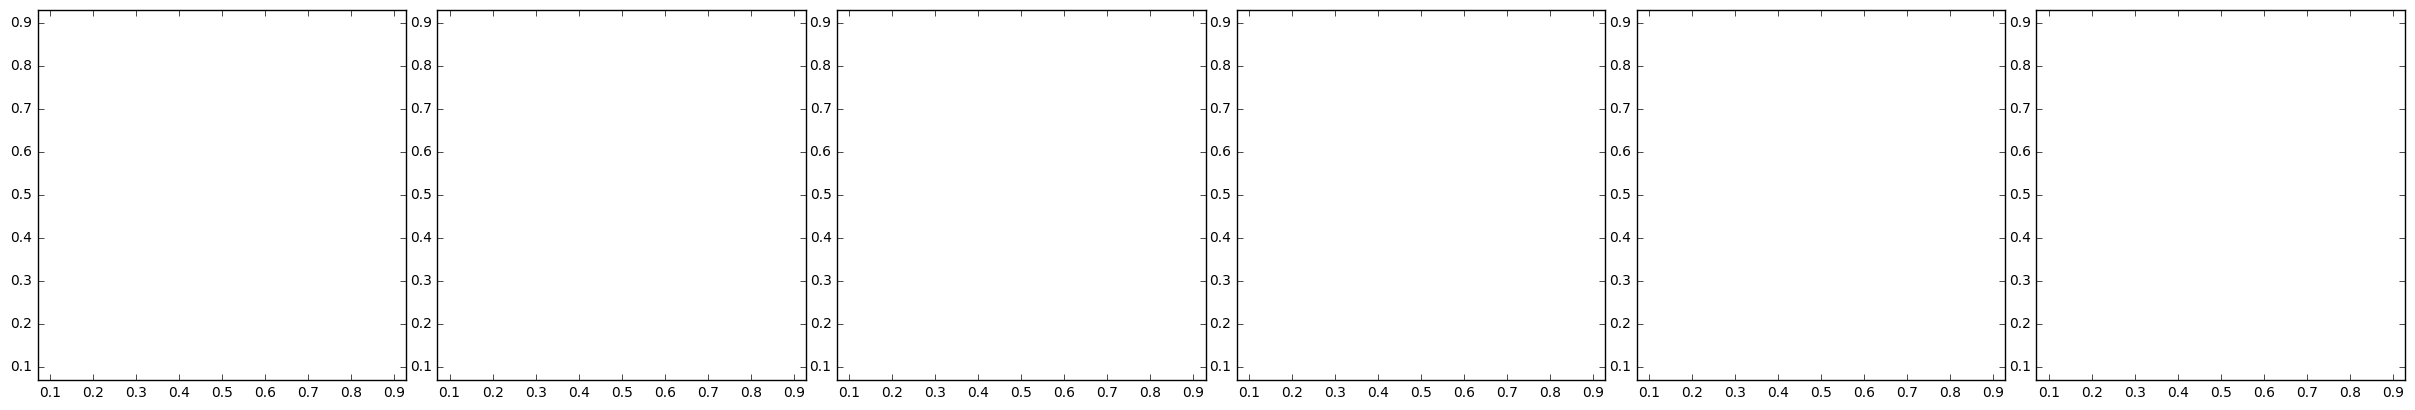

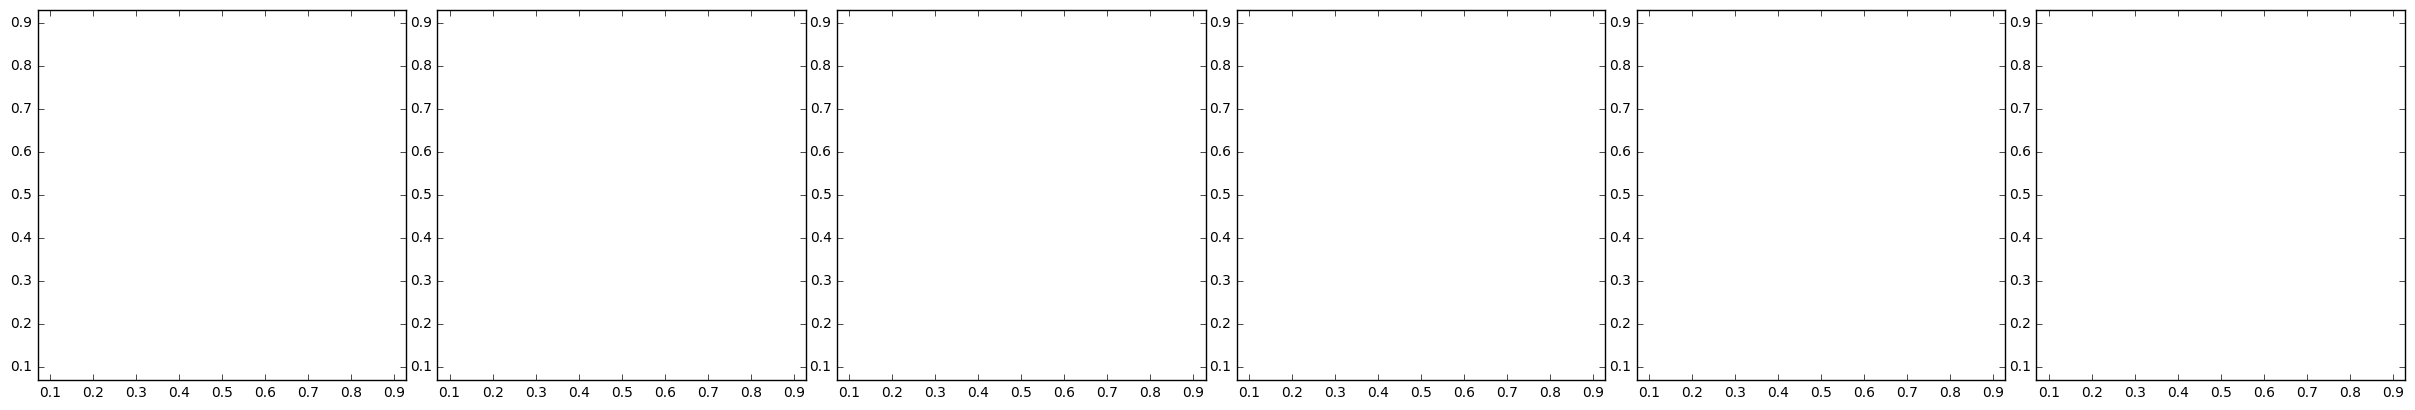

In [7]:

from obspy import read_events
cat = read_events("https://www.ldeo.columbia.edu/~gcmt/projects/CMT/"
                         "catalog/NEW_MONTHLY/2016/"
                         "feb16.ndk")


#cat.plot()
ev = cat[0]
ev.plot()
#kind="mayavi"

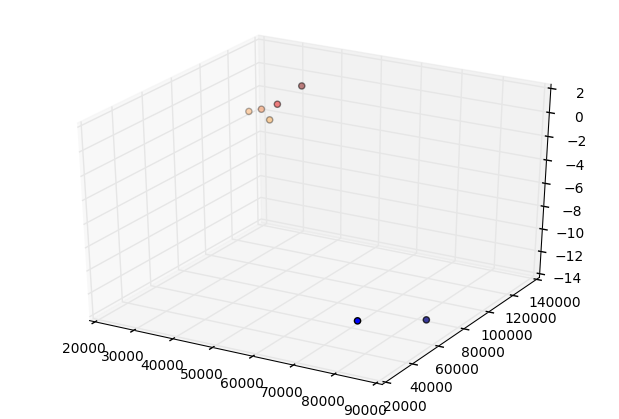

In [99]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,depth,c=depth,cmap=plt.cm.jet)  
plt.show()

In [11]:
x

array([ 0.32221478,  0.03356378,  0.63548054,  0.88171846,  0.195621  ,
        0.49190984,  0.8839722 ,  0.88082612,  0.07657994,  0.10390306,
        0.09140589,  0.73244796,  0.12718305,  0.91106223,  0.02427061,
        0.99156521,  0.68256552,  0.00461031,  0.87193079,  0.82246135,
        0.66518337,  0.23012409,  0.76146733,  0.88253663,  0.05941177,
        0.3924903 ,  0.57127863,  0.25327469,  0.20624344,  0.60817304,
        0.91473264,  0.48014234,  0.7388459 ,  0.35780778,  0.19530682,
        0.77848739,  0.63498832,  0.93403927,  0.02299526,  0.23739578])